# Math 124 - Programming for Mathematical Applications

## 3 - Random numbers and Monte Carlo simulation

UC Berkeley, Spring 2019

[Per-Olof Persson](http://persson.berkeley.edu) (<persson@berkeley.edu>)

### Uniformly distributed random numbers

The function `rand(n)` generates $n$ so-called *pseudo-random* numbers from a uniform distribution on $[0,1]$. This means that the numbers are technically fully deterministic, but for most practical purposes they can be seen as random. These numbers have a wide range of application in computing, for statistical simulations, studying noise, etc.

In [1]:
rand()               # Defaults to n = 1 random number

0.310853500011401

In [2]:
rand()               # Different output each time

0.44038035706326717

In [3]:
rand(3)              # Array of 3 random numbers

3-element Array{Float64,1}:
 0.05799869851702   
 0.35937482300579027
 0.20449416394348496

Note that all the generated numbers are different, which we would expect from a random number generator. However, sometimes it is useful to be able to generate the same sequence of random numbers (e.g. for debugging code). This can be done using the `Random.seed!` command from the `Random` package, and an arbitrary so-called *seed* number:

In [4]:
using Random
Random.seed!(1234)      # Seed number 1234
println(rand(3))
println(rand(5))
Random.seed!(1234)      # Re-seed with same number - will give the same sequence of random numbers
println(rand(2))
println(rand(6))

[0.590845, 0.766797, 0.566237]
[0.460085, 0.794026, 0.854147, 0.200586, 0.298614]
[0.590845, 0.766797]
[0.566237, 0.460085, 0.794026, 0.854147, 0.200586, 0.298614]


### Other intervals

To generate uniform random numbers from a different interval $[a,b]$, you can simply scale a random number $x\in [0,1]$ by $a + x(b-a)$. For example:

In [5]:
y = 2rand(5) .- 1     # 5 uniform random numbers on [-1,1]

5-element Array{Float64,1}:
 -0.506325626779982  
  0.15934446673808322
  0.29776390041869094
 -0.9781882207288093 
 -0.8671539260893253 

In [6]:
z = 7rand(3) .+ 4    # 3 uniform random numbers on [4,11]

3-element Array{Float64,1}:
 10.697273545220465 
  8.526836870721521 
  4.7874010983099815

### Random integers

The `rand` function can also be used with a range or a vector, from which it chooses samples at random. This can be used to generate random integers:

In [7]:
rand(1:10, 3)        # 3 random integers between 1 and 10

3-element Array{Int64,1}:
 4
 9
 3

but also more generally to select any objects from a vector at random:

In [8]:
rand([π, exp(1), -1.0], 5)

5-element Array{Float64,1}:
 3.141592653589793
 3.141592653589793
 2.718281828459045
 2.718281828459045
 2.718281828459045

### Normal distributions

The function `randn` is similar to `rand` but draws random numbers from a normal distribution with mean 0 and standard deviation 1. 

### Visualization using histograms

We can visualize a set of random numbers by counting their frequencies and plot a *histogram*. The function below counts how many times each integer in 1 up to `nbr_outcomes` appears in `sequence`:

In [9]:
function count_histogram(nbr_outcomes, sequence)
    count = zeros(nbr_outcomes)
    for x in sequence
        count[x] += 1
    end
    count
end

count_histogram (generic function with 1 method)

We can now e.g. visualize the probability of getting 1,2,...,6 when rolling a fair die. The function below simulates the rolling of a die $n$ times, by repeatedly drawing random numbers between 1 and 6. Next it uses the `count_histogram` function above to count the frequency of each outcome, and divides by $n$ to estimate the probability:

In [10]:
using PyPlot

function simulate_die(ntrials)
    outcomes = collect(1:6)     # Simulate a fair die
    x = rand(outcomes, ntrials);
    bar(outcomes, count_histogram(6, x) / ntrials)
    xlabel("Die outcome")
    ylabel("Probability")
end

simulate_die(1000)

PyObject Text(24.0, 0.5, 'Probability')

As a generalization, we can simulate rolling a die $n$ times and adding all the outcomes:

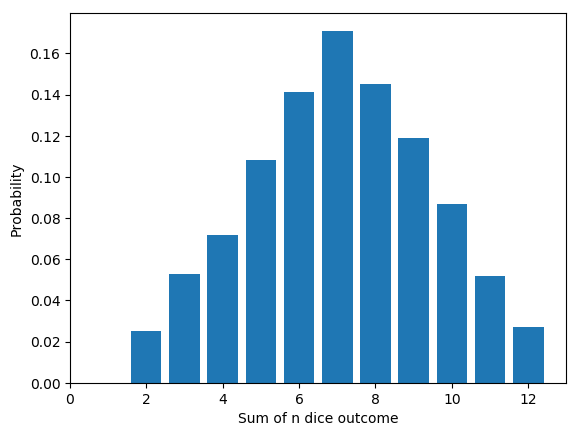

PyObject Text(24.000000000000007, 0.5, 'Probability')

In [11]:
function simulate_sum_of_n_dice(ntrials, ndice)
    outcomes = collect(1:6)     # Simulate fair dice
    x = zeros(Int64, ntrials)
    for i = 1:ndice
        x .+= rand(outcomes, ntrials)
    end
    outcomesn = collect(1:6ndice)
    bar(outcomesn, count_histogram(6ndice, x) / ntrials)
    xlabel("Sum of n dice outcome")
    ylabel("Probability")
end

simulate_sum_of_n_dice(1000, 2)    # Two dice

The famous *central limit theorem* states that this distribution approaches a normal distribution as the number of dice rolls increases:

In [12]:
simulate_sum_of_n_dice(10000, 50)

PyObject Text(24.0, 0.5, 'Probability')

### General histogram into bins

PyPlot also provides a histogram function which can automatically choose an arbitrary number of "bins". For example, this code histograms 10000 random numbers from the normal distribution by counting the frequencies inside each of 50 equally sized bins:

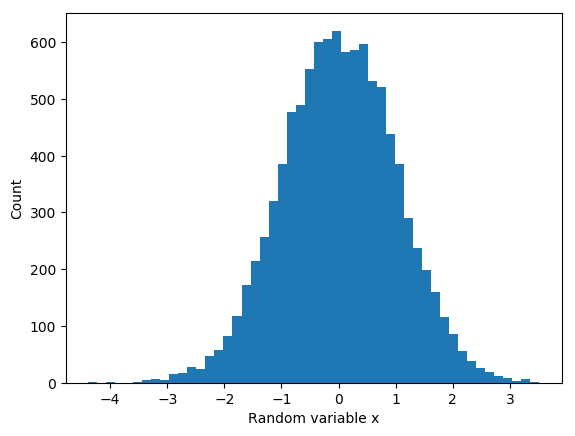

PyObject Text(24.000000000000007, 0.5, 'Count')

In [13]:
x = randn(10000)
nbins = 50

plt[:hist](x, nbins)
xlabel("Random variable x")
ylabel("Count")

### Estimate pi by throwing darts

Random number can be used to approximate areas, or more generally, to estimate integrals. To illustrate this, consider a 2-by-2 square with a unit disk inside. Imagine throwing $n$ darts on the square with equal probability everywhere. Then the fraction of darts that hit inside the circle should approximate the ratio between the areas, that is:
$$
\frac{\mathrm{hits}}{n} \approx \frac{\pi r^2}{(2r)^2}
$$
where the radius $r=1$. This means we can estimate $\pi$ as
$$
\pi \approx 4 \frac{\mathrm{hits}}{n}
$$

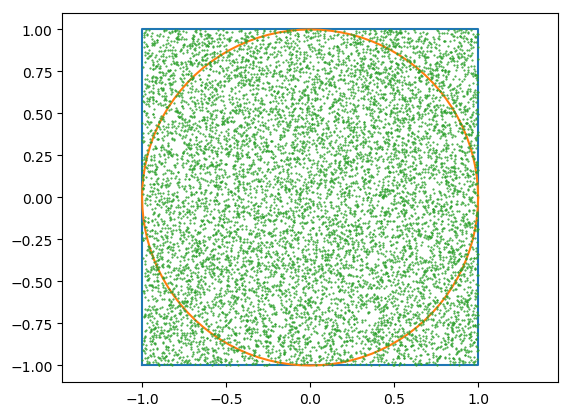

3.134

In [14]:
n = 10000               # Number of darts
x = 2rand(n) .- 1       # Coordinates
y = 2rand(n) .- 1

plot([-1,1,1,-1,-1], [-1,-1,1,1,-1])  # Draw square
theta = 2π*(0:100)./100               # Draw circle
plot(cos.(theta), sin.(theta))   
plot(x, y, linestyle="None", marker=".", markersize=1)   # Plot dart points
axis("equal")

# Determine if points are inside the circle (a "hit")
hits = 0
for i = 1:n
    if x[i]^2 + y[i]^2 ≤ 1
        hits += 1
    end
end

approx_pi = 4hits / n

### Example: Random walk

A *random walk* can be described by the following algorithm:

- Consider a 2d array of squares
- Start at the center square
- At each turn, randomly choose a direction (up/down/left/right)
- Continue until reaching an edge

In [15]:
function random_walk(n)
    x = [0]
    y = [0]
    while abs(x[end]) < n && abs(y[end]) < n
        if rand() < 0.5
            if rand() < 0.5  # Up
                push!(x, x[end])
                push!(y, y[end] + 1)
            else             # Down
                push!(x, x[end])
                push!(y, y[end] - 1)
            end
        else
            if rand() < 0.5  # Right
                push!(x, x[end] + 1)
                push!(y, y[end])
            else             # Left    
                push!(x, x[end] - 1)
                push!(y, y[end])
            end
        end
    end
    x,y
end    

random_walk (generic function with 1 method)

In [16]:
n = 10
x,y = random_walk(n)

plot(x, y, marker=".", markersize=8)     # Draw dots at each point in x,y
grid(true)
axis([-n,n,-n,n]);

## Monte Carlo simulations

A common technique to estimate probabilities and statistical quantities is *Monte Carlo simulation*. The computer runs many simulations that depend on random numbers and record the outcomes. The desired quantity can then be estimated by simple fractions.

As an example, the code below simulates rolling a die repeatedly until it rolls a 6, and recording the number of rolls that it took. The average number of rolls required can then be estimated.

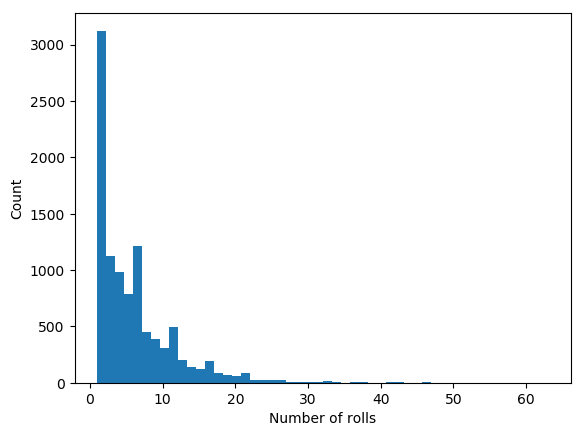

5.9952

In [17]:
ntrials = 10000            # Number of experiments
x = Int64[]                # Array of outcomes
sumx = 0
for i = 1:ntrials
    nrolls = 0
    found_a_six = false
    while !found_a_six
        nrolls += 1
        roll = rand(1:6)
        if roll == 6
            found_a_six = true
        end
    end
    push!(x, nrolls)
    sumx += nrolls
end

plt[:hist](x, 50);
xlabel("Number of rolls")
ylabel("Count")
average = sumx / ntrials

### Card games, permutations

To simulate card games, we need a way to represent the cards. There are 13 *ranks* and 4 *suits*, so we could simply use an integer between 1 and 52 and let 1 to 13 represent Ace, 2, 3, ..., King of clubs, 14 to 26 all the diamonds, etc. We can use integer division and remainder to find the rank and suit:

In [18]:
function card_rank(card)
    (card - 1) % 13 + 1
end

function card_suit(card)
    (card - 1) ÷ 13 + 1
end

cards = 1:52      # All cards
[card_rank.(cards) card_suit.(cards)]

52×2 Array{Int64,2}:
  1  1
  2  1
  3  1
  4  1
  5  1
  6  1
  7  1
  8  1
  9  1
 10  1
 11  1
 12  1
 13  1
  ⋮   
  2  4
  3  4
  4  4
  5  4
  6  4
  7  4
  8  4
  9  4
 10  4
 11  4
 12  4
 13  4

We can now draw a random card by generating a random integer between 1 and 52. However, to deal e.g. a poker hand of 5 cards, we need to make sure we do not draw the same card twice. One way to do this is with Julia's `randperm(n)` function, which generates a random permutation of the integers 1 up to `n`. We can use this to represent a shuffled deck of cards, and use the first 5 cards to deal a poker hand:

In [19]:
cards = randperm(52)
hand = cards[1:5]
[card_rank.(hand) card_suit.(hand)]

5×2 Array{Int64,2}:
  4  1
  4  4
  4  3
 10  4
  2  3

### Example: Probability of flush

A *flush* means that all cards have the same suit. To estimate the probabilty that a random poker hand is a flush, we run Monte Carlo simulation:

In [20]:
ntrials = 100000
nflush = 0
for itrial = 1:ntrials
    cards = randperm(52)
    hand = cards[1:5]

    suits = card_suit.(hand)
    same_suit = true
    for i = 2:5
        if suits[i] ≠ suits[1]
            same_suit = false
            break
        end
    end
    if same_suit
        nflush += 1
    end
end

approx_probability = nflush / ntrials

0.00201

This problem can also be solved using combinatorial techniques, which we can use to check the approximation:

In [21]:
exact_probability = 4 * binomial(13,5) / binomial(52,5)

0.0019807923169267707